# Example

In [1]:
import numpy as np
from Generators.BL import BL
from Samplers.IAF_ASDM import IAF_ASDM

In [2]:
dur = 5

dt = 0.005

f_max = 3
bw = 2 * np.pi * f_max

N_c = 3

In [3]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate()

In [4]:
bias = 4.2
threshold = 0.7
k_constant = 0.1

In [5]:
iaf_asdm = IAF_ASDM(bias, threshold, k_constant)

iaf_asdm.setSignal(t, u, dt, bw)

spikes = iaf_asdm.encode()

u_rec = iaf_asdm.decode()

iaf_asdm.summary()

Integrate-and-Fire Sampler - ASDM
From "TIME ENCODING AND PERFECT RECOVERY OF BANDLIMITED SIGNALS"
Aurel A. Lazar, Laszlo T. Toth, 2003
Status: DECODED
Parameters:
Bias 'b': 4.2
Threshold 'delta': 0.7
Integretor constant 'k': 0.1


/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


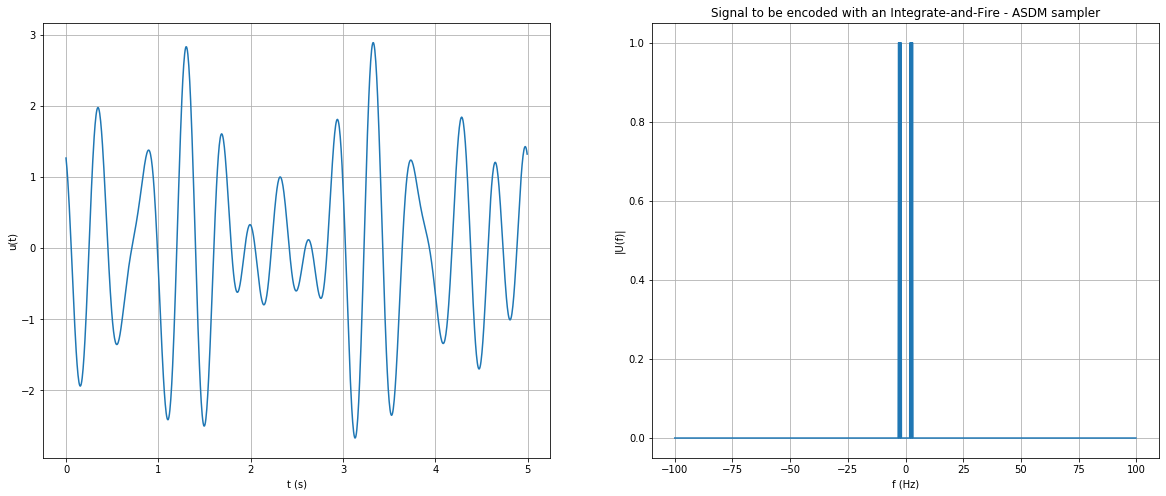

In [6]:
iaf_asdm.plotSignal()

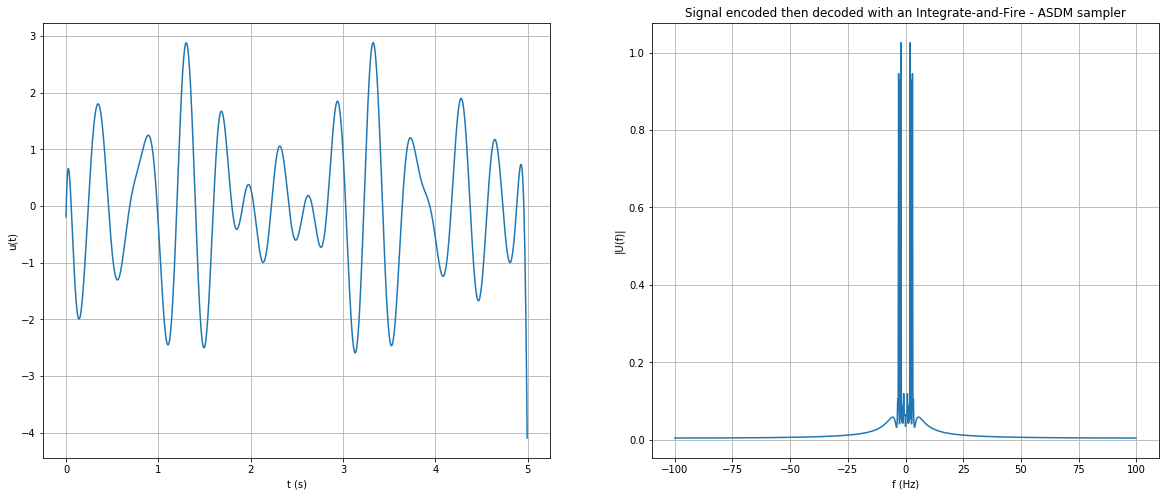

In [7]:
iaf_asdm.plotRecoveredSignal()

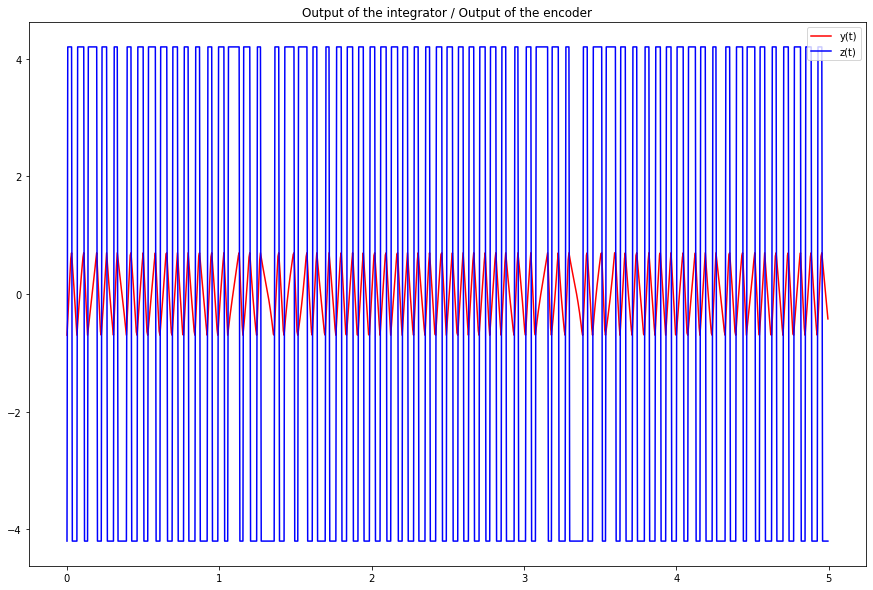

In [8]:
iaf_asdm.plotIntegralAndEncoderOutput()

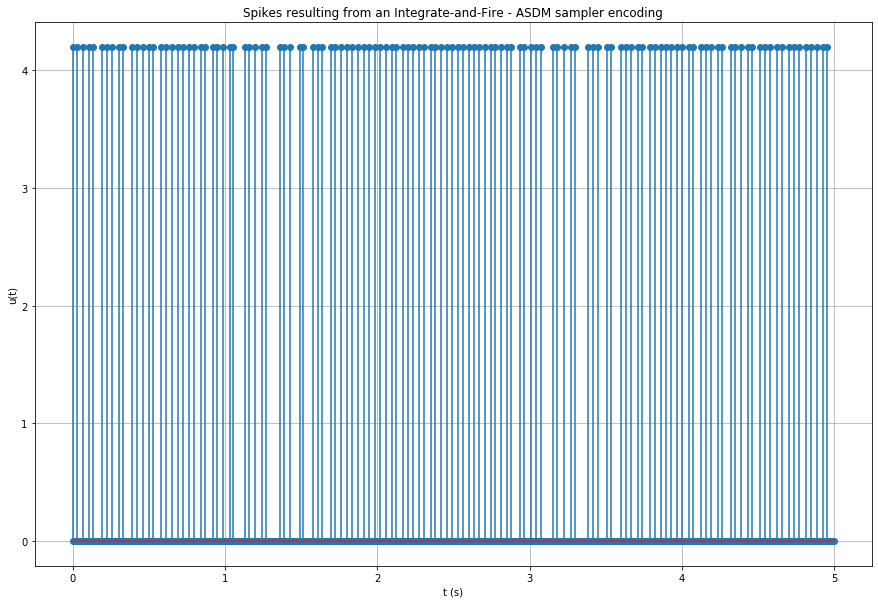

In [9]:
iaf_asdm.plotSpikes()

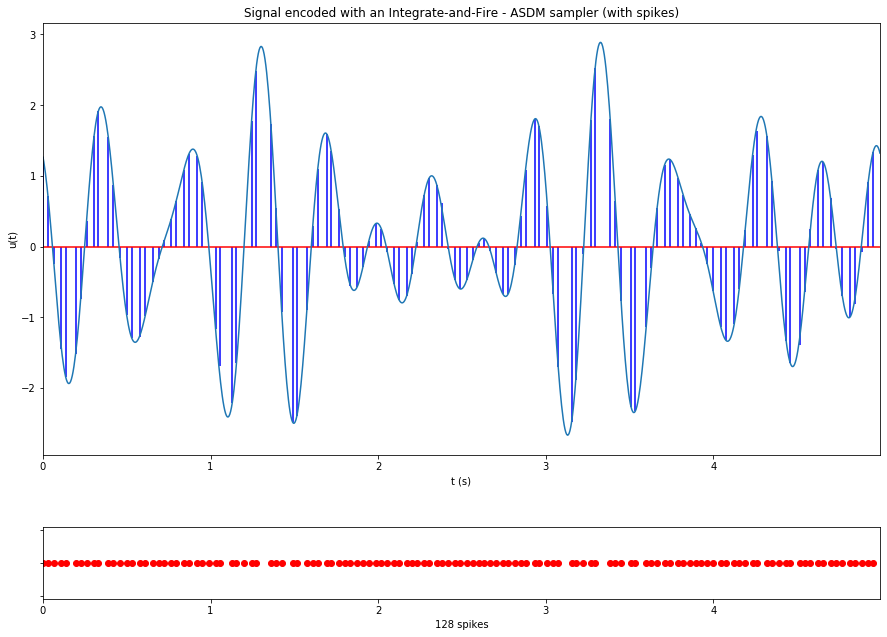

In [10]:
iaf_asdm.plotSignalAndSpikes()

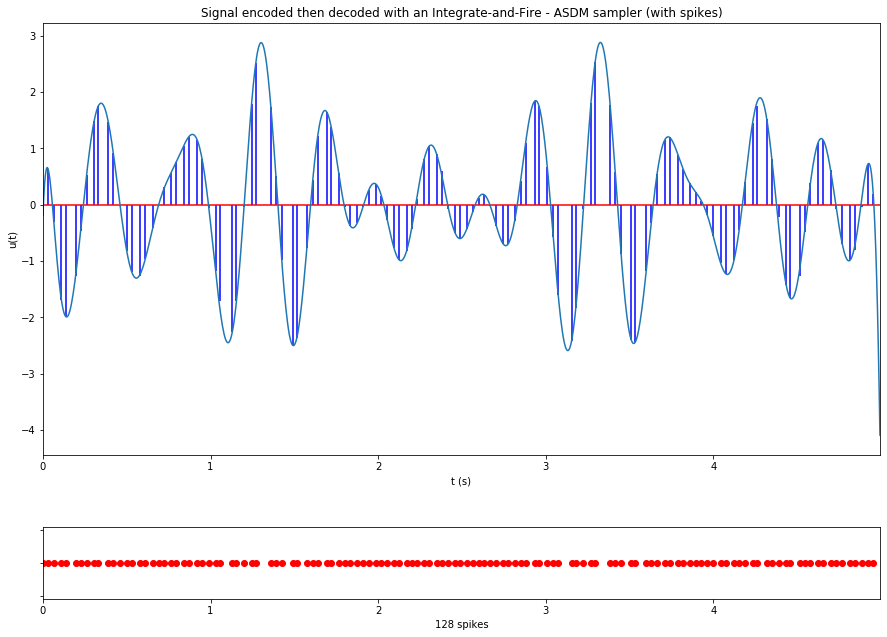

In [11]:
iaf_asdm.plotRecoveredSignalAndSpikes()

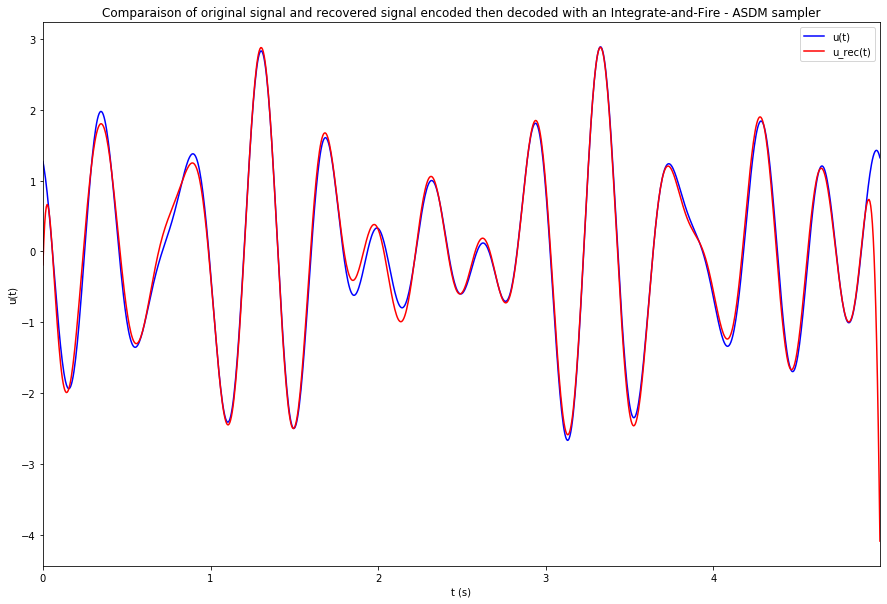

In [12]:
iaf_asdm.plotSignalAndRecoveredSignal()

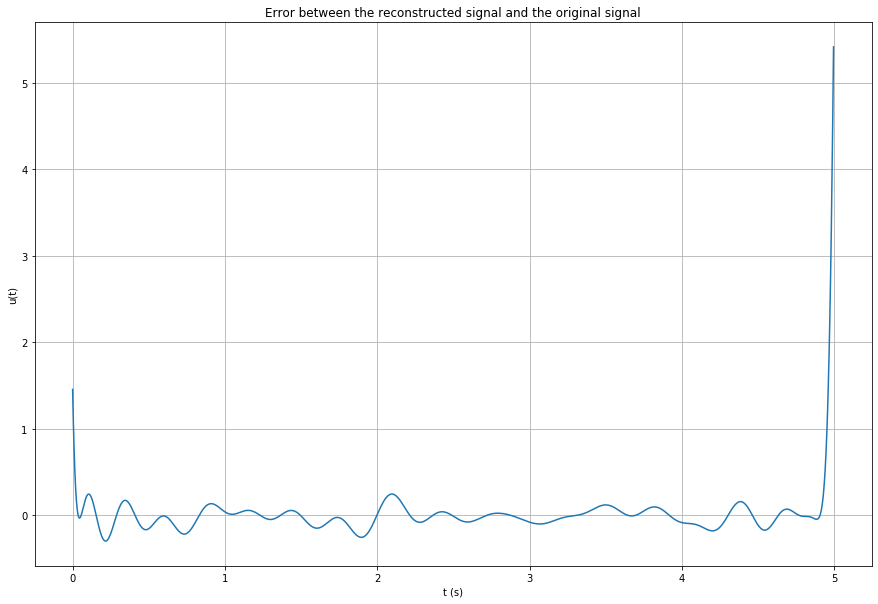

In [13]:
iaf_asdm.plotError()

In [14]:
print(f'The mean squared error of the signal is : {iaf_asdm.computeMeanSquaredError()}')

The mean squared error of the signal is : 111.0698670993034


# Experiments

In [15]:
import matplotlib.pyplot as plt

In [16]:
dur = 5
dt = 0.005
f_max = 3
bw = 2 * np.pi * f_max
N_c = 3

In [17]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate()
max_u = np.max(u)

In [18]:
bias = 4.2
threshold = 0.7
k_constant = 0.1

In [19]:
dx = 0.01
biases = [max_u+dx, max_u + 0.5, max_u +1.5, max_u + 3, max_u + 4.5, max_u + 6]
thresholds = [0.25, 0.37, 0.5, 0.62, 0.75, 0.9]
k_constants = [0.008, 0.04, 0.1, 0.15, 0.2, 0.25]

## Effect of $b$

In [20]:
iaf_asdm_1 = IAF_ASDM(biases[0], threshold, k_constant)
iaf_asdm_1.setSignal(t, u, dt, bw)
iaf_asdm_1.encode()
u_rec = iaf_asdm_1.decode()

In [21]:
iaf_asdm_2 = IAF_ASDM(biases[1], threshold, k_constant)
iaf_asdm_2.setSignal(t, u, dt, bw)
iaf_asdm_2.encode()
u_rec = iaf_asdm_2.decode()

In [22]:
iaf_asdm_3 = IAF_ASDM(biases[2], threshold, k_constant)
iaf_asdm_3.setSignal(t, u, dt, bw)
iaf_asdm_3.encode()
u_rec = iaf_asdm_3.decode()

In [23]:
iaf_asdm_4 = IAF_ASDM(biases[3], threshold, k_constant)
iaf_asdm_4.setSignal(t, u, dt, bw)
iaf_asdm_4.encode()
u_rec = iaf_asdm_4.decode()

In [24]:
iaf_asdm_5 = IAF_ASDM(biases[4], threshold, k_constant)
iaf_asdm_5.setSignal(t, u, dt, bw)
iaf_asdm_5.encode()
u_rec = iaf_asdm_5.decode()

In [25]:
iaf_asdm_6 = IAF_ASDM(biases[5], threshold, k_constant)
iaf_asdm_6.setSignal(t, u, dt, bw)
iaf_asdm_6.encode()
u_rec = iaf_asdm_6.decode()

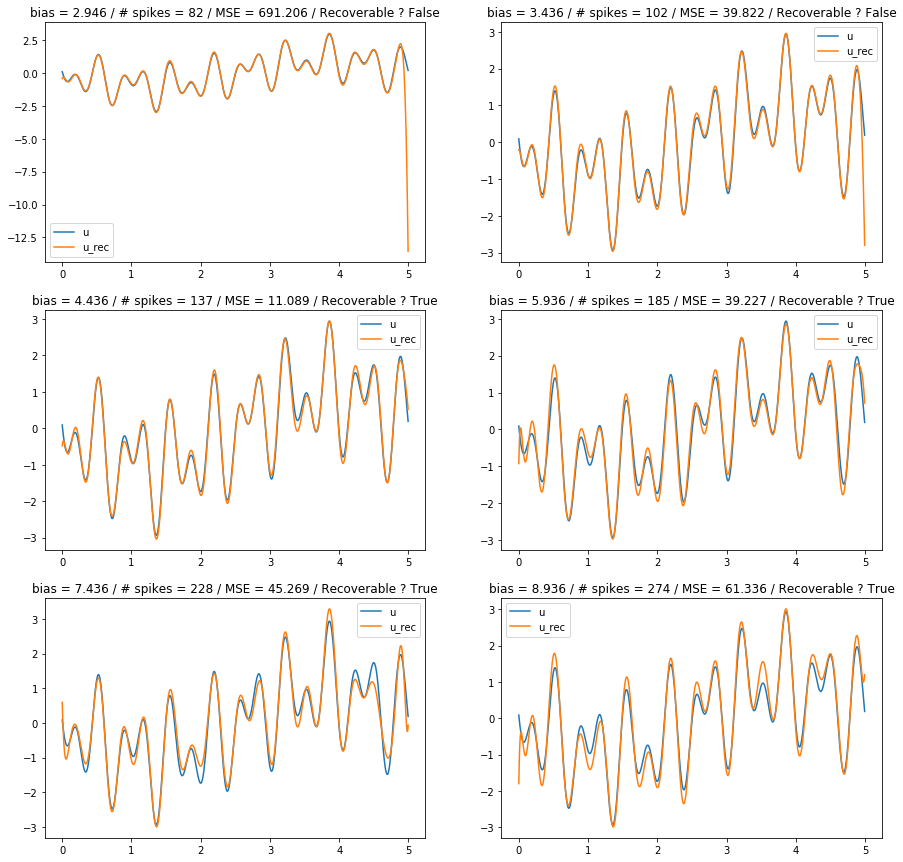

In [26]:
plt.figure(figsize = (15, 15))
plt.subplot(3,2,1)
plt.title(f'bias = {round(iaf_asdm_1.bias, 3)} / # spikes = {iaf_asdm_1.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1.isRecoverable()}')
plt.plot(iaf_asdm_1.t, iaf_asdm_1.u , label = 'u')
plt.plot(iaf_asdm_1.t, iaf_asdm_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,2)
plt.title(f'bias = {round(iaf_asdm_2.bias, 3)} / # spikes = {iaf_asdm_2.getNumberOfSpikes()} / MSE = {round(iaf_asdm_2.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_2.isRecoverable()}')
plt.plot(iaf_asdm_2.t, iaf_asdm_2.u , label = 'u')
plt.plot(iaf_asdm_2.t, iaf_asdm_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,3)
plt.title(f'bias = {round(iaf_asdm_3.bias, 3)} / # spikes = {iaf_asdm_3.getNumberOfSpikes()} / MSE = {round(iaf_asdm_3.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_3.isRecoverable()}')
plt.plot(iaf_asdm_3.t, iaf_asdm_3.u , label = 'u')
plt.plot(iaf_asdm_3.t, iaf_asdm_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,4)
plt.title(f'bias = {round(iaf_asdm_4.bias, 3)} / # spikes = {iaf_asdm_4.getNumberOfSpikes()} / MSE = {round(iaf_asdm_4.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_4.isRecoverable()}')
plt.plot(iaf_asdm_4.t, iaf_asdm_4.u , label = 'u')
plt.plot(iaf_asdm_4.t, iaf_asdm_4.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,5)
plt.title(f'bias = {round(iaf_asdm_5.bias, 3)} / # spikes = {iaf_asdm_5.getNumberOfSpikes()} / MSE = {round(iaf_asdm_5.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_5.isRecoverable()}')
plt.plot(iaf_asdm_5.t, iaf_asdm_5.u , label = 'u')
plt.plot(iaf_asdm_5.t, iaf_asdm_5.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,6)
plt.title(f'bias = {round(iaf_asdm_6.bias, 3)} / # spikes = {iaf_asdm_6.getNumberOfSpikes()} / MSE = {round(iaf_asdm_6.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_6.isRecoverable()}')
plt.plot(iaf_asdm_6.t, iaf_asdm_6.u , label = 'u')
plt.plot(iaf_asdm_6.t, iaf_asdm_6.u_rec, label = 'u_rec')
plt.legend()

plt.savefig('saved_images/bias_variability.png')

In [27]:
mses_bias = [
    iaf_asdm_1.computeMeanSquaredError(),
    iaf_asdm_2.computeMeanSquaredError(),
    iaf_asdm_3.computeMeanSquaredError(),
    iaf_asdm_4.computeMeanSquaredError(),
    iaf_asdm_5.computeMeanSquaredError(),
    iaf_asdm_6.computeMeanSquaredError()
]

arg_bias = np.argmin(mses_bias)
best_bias = biases[arg_bias]

print(f'Best bias : {best_bias}')

Best bias : 4.43602818011281


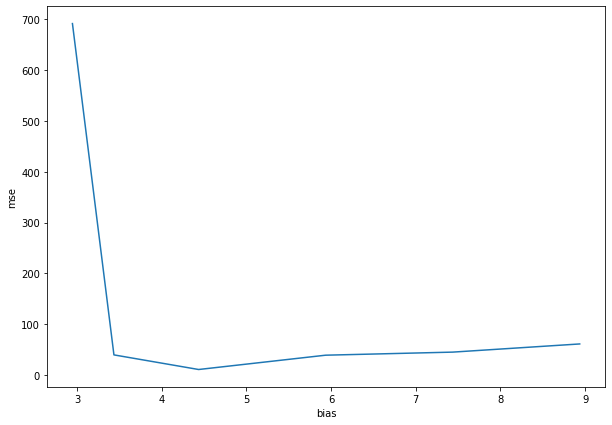

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(biases, mses_bias)
plt.xlabel('bias')
plt.ylabel('mse')
plt.show()

## Effect of $\delta$

In [29]:
iaf_asdm_1_1 = IAF_ASDM(biases[arg_bias], thresholds[0], k_constant)
iaf_asdm_1_1.setSignal(t, u, dt, bw)
iaf_asdm_1_1.encode()
u_rec = iaf_asdm_1_1.decode()

In [30]:
iaf_asdm_1_2 = IAF_ASDM(biases[arg_bias], thresholds[1], k_constant)
iaf_asdm_1_2.setSignal(t, u, dt, bw)
iaf_asdm_1_2.encode()
u_rec = iaf_asdm_1_2.decode()

In [31]:
iaf_asdm_1_3 = IAF_ASDM(biases[arg_bias], thresholds[2], k_constant)
iaf_asdm_1_3.setSignal(t, u, dt, bw)
iaf_asdm_1_3.encode()
u_rec = iaf_asdm_1_3.decode()

In [32]:
iaf_asdm_1_4 = IAF_ASDM(biases[arg_bias], thresholds[3], k_constant)
iaf_asdm_1_4.setSignal(t, u, dt, bw)
iaf_asdm_1_4.encode()
u_rec = iaf_asdm_1_4.decode()

In [33]:
iaf_asdm_1_5 = IAF_ASDM(biases[arg_bias], thresholds[4], k_constant)
iaf_asdm_1_5.setSignal(t, u, dt, bw)
iaf_asdm_1_5.encode()
u_rec = iaf_asdm_1_5.decode()

In [34]:
iaf_asdm_1_6 = IAF_ASDM(biases[arg_bias], thresholds[5], k_constant)
iaf_asdm_1_6.setSignal(t, u, dt, bw)
iaf_asdm_1_6.encode()
u_rec = iaf_asdm_1_6.decode()

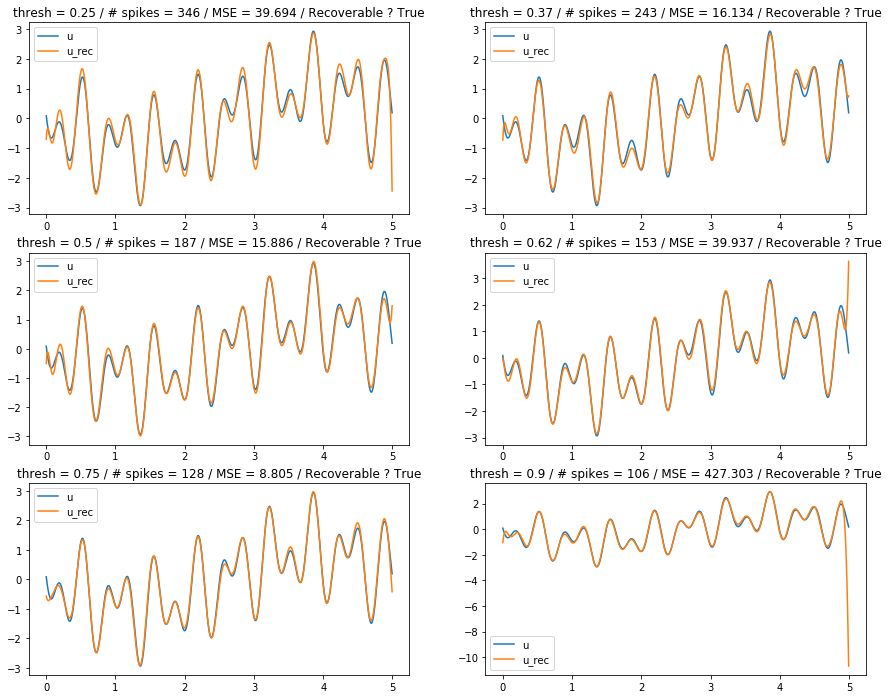

In [35]:
plt.figure(figsize = (15, 12))
plt.subplot(3,2,1)
plt.title(f'thresh = {round(iaf_asdm_1_1.threshold, 3)} / # spikes = {iaf_asdm_1_1.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_1.isRecoverable()}')
plt.plot(iaf_asdm_1_1.t, iaf_asdm_1_1.u , label = 'u')
plt.plot(iaf_asdm_1_1.t, iaf_asdm_1_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,2)
plt.title(f'thresh = {round(iaf_asdm_1_2.threshold, 3)} / # spikes = {iaf_asdm_1_2.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_2.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_2.isRecoverable()}')
plt.plot(iaf_asdm_1_2.t, iaf_asdm_1_2.u , label = 'u')
plt.plot(iaf_asdm_1_2.t, iaf_asdm_1_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,3)
plt.title(f'thresh = {round(iaf_asdm_1_3.threshold, 3)} / # spikes = {iaf_asdm_1_3.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_3.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_3.isRecoverable()}')
plt.plot(iaf_asdm_1_3.t, iaf_asdm_1_3.u , label = 'u')
plt.plot(iaf_asdm_1_3.t, iaf_asdm_1_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,4)
plt.title(f'thresh = {round(iaf_asdm_1_4.threshold, 3)} / # spikes = {iaf_asdm_1_4.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_4.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_4.isRecoverable()}')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_4.u , label = 'u')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_4.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,5)
plt.title(f'thresh = {round(iaf_asdm_1_5.threshold, 3)} / # spikes = {iaf_asdm_1_5.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_5.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_5.isRecoverable()}')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_5.u , label = 'u')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_5.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,6)
plt.title(f'thresh = {round(iaf_asdm_1_6.threshold, 3)} / # spikes = {iaf_asdm_1_6.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_6.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_6.isRecoverable()}')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_6.u , label = 'u')
plt.plot(iaf_asdm_1_4.t, iaf_asdm_1_6.u_rec, label = 'u_rec')
plt.legend()

In [36]:
mses_thresh = [
    iaf_asdm_1_1.computeMeanSquaredError(),
    iaf_asdm_1_2.computeMeanSquaredError(),
    iaf_asdm_1_3.computeMeanSquaredError(),
    iaf_asdm_1_4.computeMeanSquaredError(),
    iaf_asdm_1_5.computeMeanSquaredError(),
    iaf_asdm_1_6.computeMeanSquaredError(),
]

arg_thresh = np.argmin(mses_thresh)
best_thresh = thresholds[arg_thresh]

print(f'Best threshold : {best_thresh}')

Best threshold : 0.75


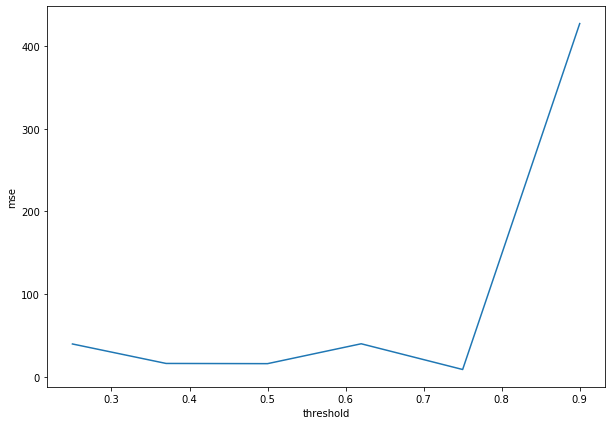

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(thresholds, mses_thresh)
plt.xlabel('threshold')
plt.ylabel('mse')
plt.show()

## Effect of $\kappa$

In [38]:
iaf_asdm_1_1_1 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[0])
iaf_asdm_1_1_1.setSignal(t, u, dt, bw)
iaf_asdm_1_1_1.encode()
u_rec = iaf_asdm_1_1_1.decode()

In [39]:
iaf_asdm_1_1_2 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[1])
iaf_asdm_1_1_2.setSignal(t, u, dt, bw)
iaf_asdm_1_1_2.encode()
u_rec = iaf_asdm_1_1_2.decode()

In [40]:
iaf_asdm_1_1_3 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[2])
iaf_asdm_1_1_3.setSignal(t, u, dt, bw)
iaf_asdm_1_1_3.encode()
u_rec = iaf_asdm_1_1_3.decode()

In [41]:
iaf_asdm_1_1_4 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[3])
iaf_asdm_1_1_4.setSignal(t, u, dt, bw)
iaf_asdm_1_1_4.encode()
u_rec = iaf_asdm_1_1_4.decode()

In [42]:
iaf_asdm_1_1_5 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[4])
iaf_asdm_1_1_5.setSignal(t, u, dt, bw)
iaf_asdm_1_1_5.encode()
u_rec = iaf_asdm_1_1_5.decode()

In [43]:
iaf_asdm_1_1_6 = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[5])
iaf_asdm_1_1_6.setSignal(t, u, dt, bw)
iaf_asdm_1_1_6.encode()
u_rec = iaf_asdm_1_1_6.decode()

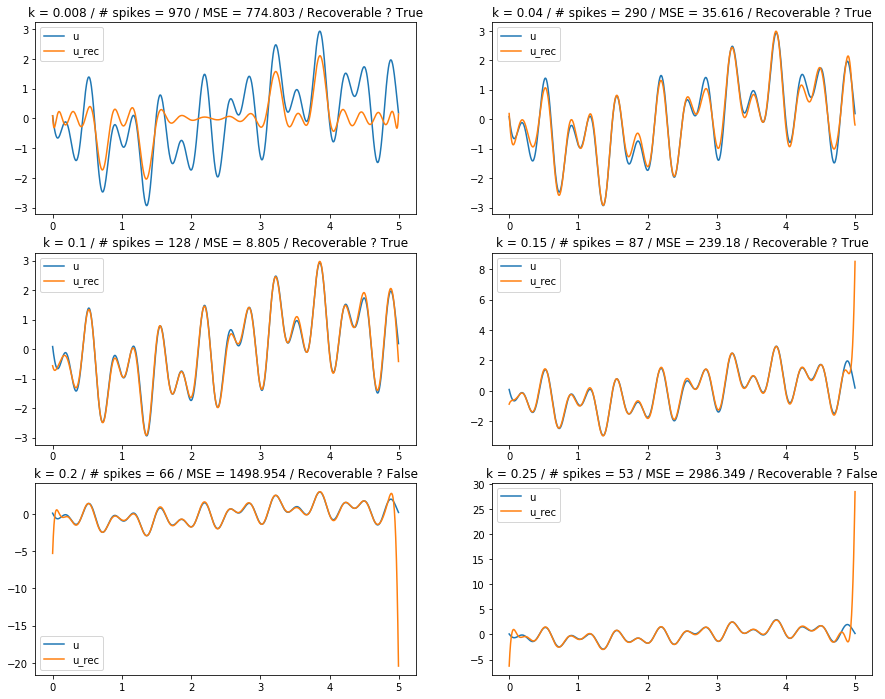

In [44]:
plt.figure(figsize = (15, 12))
plt.subplot(3,2,1)
plt.title(f'k = {round(iaf_asdm_1_1_1.k_constant, 3)} / # spikes = {iaf_asdm_1_1_1.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_1.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_1_1.isRecoverable()}')
plt.plot(iaf_asdm_1_1_1.t, iaf_asdm_1_1_1.u , label = 'u')
plt.plot(iaf_asdm_1_1_1.t, iaf_asdm_1_1_1.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,2)
plt.title(f'k = {round(iaf_asdm_1_1_2.k_constant, 3)} / # spikes = {iaf_asdm_1_1_2.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_2.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_1_2.isRecoverable()}')
plt.plot(iaf_asdm_1_1_2.t, iaf_asdm_1_1_2.u , label = 'u')
plt.plot(iaf_asdm_1_1_2.t, iaf_asdm_1_1_2.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,3)
plt.title(f'k = {round(iaf_asdm_1_1_3.k_constant, 3)} / # spikes = {iaf_asdm_1_1_3.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_3.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_1_3.isRecoverable()}')
plt.plot(iaf_asdm_1_1_3.t, iaf_asdm_1_1_3.u , label = 'u')
plt.plot(iaf_asdm_1_1_3.t, iaf_asdm_1_1_3.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,4)
plt.title(f'k = {round(iaf_asdm_1_1_4.k_constant, 3)} / # spikes = {iaf_asdm_1_1_4.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_4.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_1_4.isRecoverable()}')
plt.plot(iaf_asdm_1_1_4.t, iaf_asdm_1_1_4.u , label = 'u')
plt.plot(iaf_asdm_1_1_4.t, iaf_asdm_1_1_4.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,5)
plt.title(f'k = {round(iaf_asdm_1_1_5.k_constant, 3)} / # spikes = {iaf_asdm_1_1_5.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_5.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_1_5.isRecoverable()}')
plt.plot(iaf_asdm_1_1_5.t, iaf_asdm_1_1_5.u , label = 'u')
plt.plot(iaf_asdm_1_1_5.t, iaf_asdm_1_1_5.u_rec, label = 'u_rec')
plt.legend()
plt.subplot(3,2,6)
plt.title(f'k = {round(iaf_asdm_1_1_6.k_constant, 3)} / # spikes = {iaf_asdm_1_1_6.getNumberOfSpikes()} / MSE = {round(iaf_asdm_1_1_6.computeMeanSquaredError(), 3)} / Recoverable ? {iaf_asdm_1_1_6.isRecoverable()}')
plt.plot(iaf_asdm_1_1_6.t, iaf_asdm_1_1_6.u , label = 'u')
plt.plot(iaf_asdm_1_1_6.t, iaf_asdm_1_1_6.u_rec, label = 'u_rec')
plt.legend()

In [45]:
mses_k = [
    iaf_asdm_1_1_1.computeMeanSquaredError(),
    iaf_asdm_1_1_2.computeMeanSquaredError(),
    iaf_asdm_1_1_3.computeMeanSquaredError(),
    iaf_asdm_1_1_4.computeMeanSquaredError(),
    iaf_asdm_1_1_5.computeMeanSquaredError(),
    iaf_asdm_1_1_6.computeMeanSquaredError(),
]

arg_k = np.argmin(mses_k)
best_k = k_constants[arg_k]

print(f'Best k_constant : {best_k}')

Best k_constant : 0.1


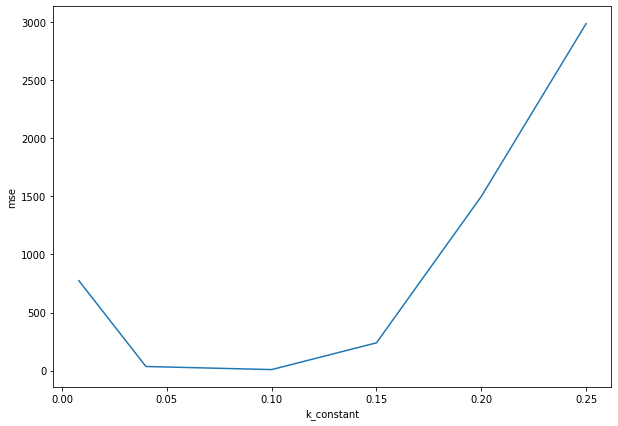

In [46]:
plt.figure(figsize=(10, 7))
plt.plot(k_constants, mses_k)
plt.xlabel('k_constant')
plt.ylabel('mse')
plt.show()

## Result

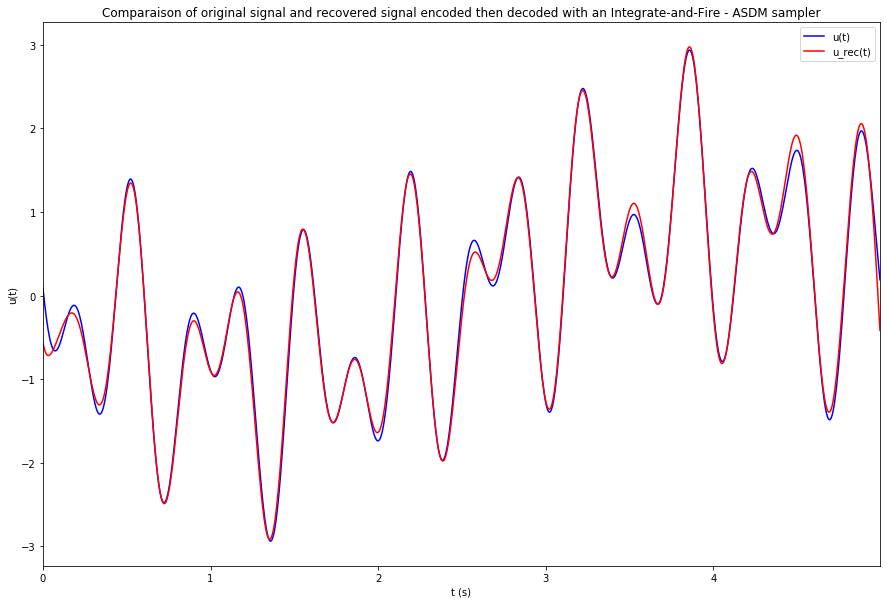

In [47]:
iaf_asdm_best = IAF_ASDM(biases[arg_bias], thresholds[arg_thresh], k_constants[arg_k])
iaf_asdm_best.setSignal(t, u, dt, bw)
iaf_asdm_best.encode()
iaf_asdm_best.decode()

iaf_asdm_best.plotSignalAndRecoveredSignal()

In [48]:
print(f'Best parameters are :')
print(f'b : {iaf_asdm_best.bias}')
print(f'threshold : {iaf_asdm_best.threshold}')
print(f'k_constant : {iaf_asdm_best.threshold}')
print(f'Is theoretically recoverable ? {iaf_asdm_best.isRecoverable()}')
print(f'For a MSE of : {iaf_asdm_best.computeMeanSquaredError()}')
print(f'Number of spikes : {iaf_asdm_best.getNumberOfSpikes()}')

Best parameters are :
b : 4.43602818011281
threshold : 0.75
k_constant : 0.75
Is theoretically recoverable ? True
For a MSE of : 8.805147026061142
Number of spikes : 128


## GridSearch :

In [49]:
mses = np.ones((6, 6, 6)) * np.inf

for idx_b, bias in enumerate(biases):
    for idx_t, threshold in enumerate(thresholds):
        for idx_k, k_constant in enumerate(k_constants):
            iaf_asdm = IAF_ASDM(bias, threshold, k_constant)
            iaf_asdm.setSignal(t, u, dt, bw)
            iaf_asdm.encode()
            try:
                iaf_asdm.decode()
                mses[idx_b, idx_t, idx_k] = iaf_asdm.computeMeanSquaredError()
            except:
                print('ERROR')
                continue

In [50]:
unrav_idx = np.unravel_index(np.argmin(mses), (6, 6, 6))

## Result

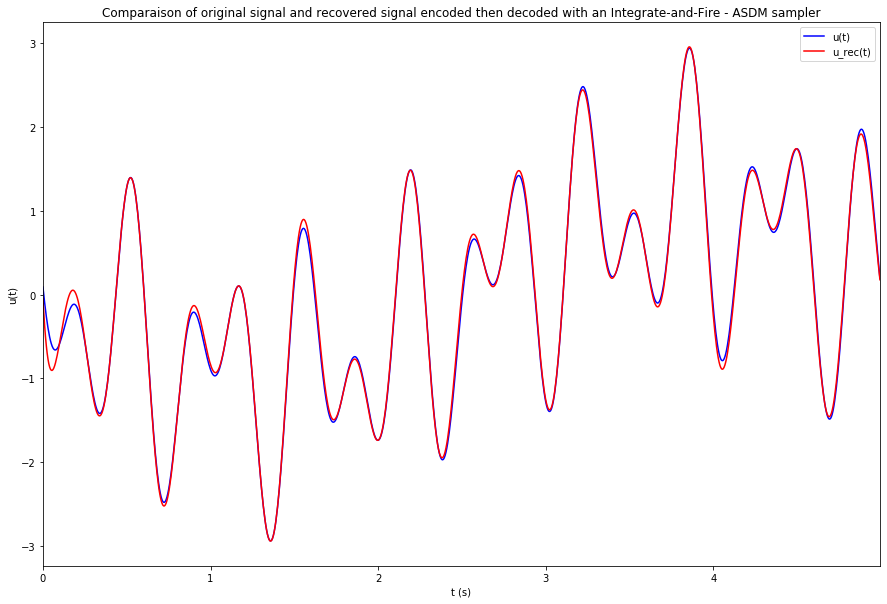

In [51]:
iaf_asdm_best = IAF_ASDM(biases[unrav_idx[0]], thresholds[unrav_idx[1]], k_constants[unrav_idx[2]])
iaf_asdm_best.setSignal(t, u, dt, bw)
iaf_asdm_best.encode()
iaf_asdm_best.decode()

iaf_asdm_best.plotSignalAndRecoveredSignal()

plt.savefig('saved_images/perfect_reconstruction.png')

In [52]:
print(f'Best parameters are :')
print(f'b : {iaf_asdm_best.bias}')
print(f'threshold : {iaf_asdm_best.threshold}')
print(f'k_constant : {iaf_asdm_best.k_constant}')
print(f'Is theoretically recoverable ? {iaf_asdm_best.isRecoverable()}')
print(f'For a MSE of : {iaf_asdm_best.computeMeanSquaredError()}')
print(f'Number of spikes : {iaf_asdm_best.getNumberOfSpikes()}')

Best parameters are :
b : 2.9460281801128105
threshold : 0.62
k_constant : 0.04
Is theoretically recoverable ? False
For a MSE of : 3.9839431374207663
Number of spikes : 218


## Effect of noise

In [53]:
from scipy.signal import firwin, lfilter
from numpy.random import normal
import plots

In [54]:
bias = iaf_asdm_best.bias
threshold = iaf_asdm_best.threshold
k_constant = iaf_asdm_best.k_constant

In [55]:
def addNoise(u, var):
    noise = normal(0, var, u.shape)
    new_signal = u + noise
    
    return new_signal

In [56]:
noises = np.linspace(0, 3, 30, endpoint=True)

In [57]:
mses_noises = np.ones(noises.shape) * np.inf

for idx_n, noise in enumerate(noises):
    iaf_asdm = IAF_ASDM(bias, threshold, k_constant)
    iaf_asdm.setSignal(t, u, dt, bw, varNoise = noise)
    iaf_asdm.encode()
    iaf_asdm.decode()
    
    mses_noises[idx_n] = iaf_asdm.computeMeanSquaredError()

In [58]:
mses_noises

array([  3.98394314,   9.11974914,  10.05826476,   9.80693576,
        40.0630098 ,  23.76006695,  34.41089409,  33.30685286,
        51.81033158,  66.99452299, 119.21653613,  56.96545057,
       116.05251964, 272.84381493, 296.4955213 , 210.38022596,
       136.66254015, 296.93706015, 237.47741631, 467.19594171,
       369.16438458, 426.8421968 , 468.25352081, 268.61079639,
       548.43341013, 531.88941029, 704.11440261, 996.52895889,
       804.92890872, 742.57658675])

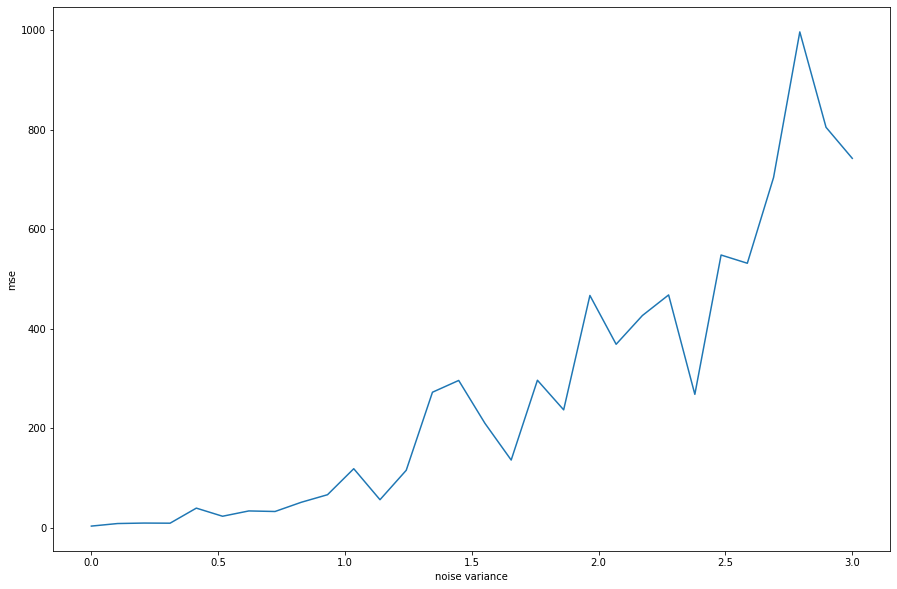

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(15, 10))
plt.plot(noises, mses_noises)
plt.xlabel('noise variance')
plt.ylabel('mse')
plt.show()

plt.savefig('saved_images/mse_per_noise.png')

In [60]:
iaf_asdm_n_4 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_4.setSignal(t, u, dt, bw, varNoise = noises[4])
iaf_asdm_n_4.encode()
iaf_asdm_n_4.decode()

array([ 1.80350248e-01,  3.52183530e-02, -9.34264368e-02, -2.06574477e-01,
       -3.05169802e-01, -3.90113751e-01, -4.62268735e-01, -5.22462075e-01,
       -5.71489821e-01, -6.10120488e-01, -6.39098631e-01, -6.59148210e-01,
       -6.70975680e-01, -6.75272757e-01, -6.72718824e-01, -6.63982942e-01,
       -6.49725438e-01, -6.30599045e-01, -6.07249604e-01, -5.80316289e-01,
       -5.50431404e-01, -5.18219714e-01, -4.84297372e-01, -4.49270435e-01,
       -4.13733012e-01, -3.78265075e-01, -3.43429980e-01, -3.09771729e-01,
       -2.77812033e-01, -2.48047223e-01, -2.20945052e-01, -1.96941460e-01,
       -1.76437339e-01, -1.59795368e-01, -1.47336957e-01, -1.39339371e-01,
       -1.36033066e-01, -1.37599303e-01, -1.44168071e-01, -1.55816369e-01,
       -1.72566889e-01, -1.94387112e-01, -2.21188876e-01, -2.52828413e-01,
       -2.89106878e-01, -3.29771399e-01, -3.74516619e-01, -4.22986765e-01,
       -4.74778218e-01, -5.29442566e-01, -5.86490146e-01, -6.45394020e-01,
       -7.05594381e-01, -

In [61]:
iaf_asdm_n_8 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_8.setSignal(t, u, dt, bw, varNoise = noises[8])
iaf_asdm_n_8.encode()
iaf_asdm_n_8.decode()

array([-1.47526584, -1.12366059, -0.8492472 , -0.64199672, -0.49248881,
       -0.39193131, -0.33217391, -0.30571595, -0.30570883, -0.32595311,
       -0.36089076, -0.40559283, -0.45574297, -0.50761704, -0.55805937,
       -0.60445586, -0.64470453, -0.67718378, -0.70071869, -0.71454601,
       -0.71827794, -0.71186524, -0.69555994, -0.66987811, -0.63556285,
       -0.59354794, -0.54492243, -0.49089629, -0.43276758, -0.37189117,
       -0.3096493 , -0.24742409, -0.18657224, -0.12840185, -0.07415165,
       -0.02497259,  0.01808817,  0.05410079,  0.08226391,  0.10191332,
        0.11252838,  0.11373605,  0.1053128 ,  0.08718439,  0.05942366,
        0.02224649, -0.02399397, -0.0788146 , -0.14161109, -0.21166785,
       -0.2881691 , -0.37021079, -0.45681328, -0.54693457, -0.63948396,
       -0.73333589, -0.82734386, -0.92035426, -1.01122001, -1.09881375,
       -1.1820406 , -1.25985026, -1.33124836, -1.39530706, -1.45117464,
       -1.49808417, -1.53536109, -1.56242973, -1.57881866, -1.58

In [62]:
iaf_asdm_n_10 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_10.setSignal(t, u, dt, bw, varNoise = noises[10])
iaf_asdm_n_10.encode()
iaf_asdm_n_10.decode()

array([ 0.51133693,  0.47151259,  0.41920109,  0.35780378,  0.29037007,
        0.21960256,  0.14786463,  0.07719022,  0.00929574, -0.05440626,
       -0.11279176, -0.16500854, -0.21045824, -0.24877746, -0.27981803,
       -0.30362684, -0.32042515, -0.33058785, -0.33462267, -0.33314963,
       -0.32688083, -0.31660071, -0.3031471 , -0.28739291, -0.27022882,
       -0.25254699, -0.23522584, -0.21911602, -0.20502766, -0.19371891,
       -0.18588579, -0.18215344, -0.18306873, -0.18909422, -0.20060352,
       -0.21787796, -0.24110458, -0.27037531, -0.30568749, -0.34694537,
       -0.3939628 , -0.44646685, -0.50410243, -0.56643761, -0.63296982,
       -0.70313262, -0.776303  , -0.85180926, -0.92893913, -1.00694822,
       -1.08506865, -1.16251771, -1.23850664, -1.31224913, -1.38296984,
       -1.44991258, -1.5123481 , -1.56958167, -1.62096002, -1.66587793,
       -1.70378413, -1.73418672, -1.75665787, -1.77083793, -1.77643875,
       -1.77324642, -1.7611232 , -1.74000879, -1.70992083, -1.67

In [63]:
iaf_asdm_n_13 = IAF_ASDM(bias, threshold, k_constant)
iaf_asdm_n_13.setSignal(t, u, dt, bw, varNoise = noises[13])
iaf_asdm_n_13.encode()
iaf_asdm_n_13.decode()

array([-6.23918793e-01, -4.94344987e-01, -3.97971299e-01, -3.29722957e-01,
       -2.84943275e-01, -2.59391840e-01, -2.49239472e-01, -2.51060171e-01,
       -2.61820329e-01, -2.78865467e-01, -2.99904763e-01, -3.22993657e-01,
       -3.46514788e-01, -3.69157557e-01, -3.89896568e-01, -4.07969223e-01,
       -4.22852710e-01, -4.34240645e-01, -4.42019589e-01, -4.46245666e-01,
       -4.47121495e-01, -4.44973611e-01, -4.40230571e-01, -4.33401887e-01,
       -4.25057940e-01, -4.15810997e-01, -4.06297433e-01, -3.97161258e-01,
       -3.89039007e-01, -3.82546067e-01, -3.78264459e-01, -3.76732116e-01,
       -3.78433656e-01, -3.83792629e-01, -3.93165255e-01, -4.06835569e-01,
       -4.25011971e-01, -4.47825097e-01, -4.75326959e-01, -5.07491273e-01,
       -5.44214899e-01, -5.85320298e-01, -6.30558923e-01, -6.79615440e-01,
       -7.32112688e-01, -7.87617266e-01, -8.45645662e-01, -9.05670813e-01,
       -9.67128998e-01, -1.02942697e+00, -1.09194925e+00, -1.15406545e+00,
       -1.21513758e+00, -

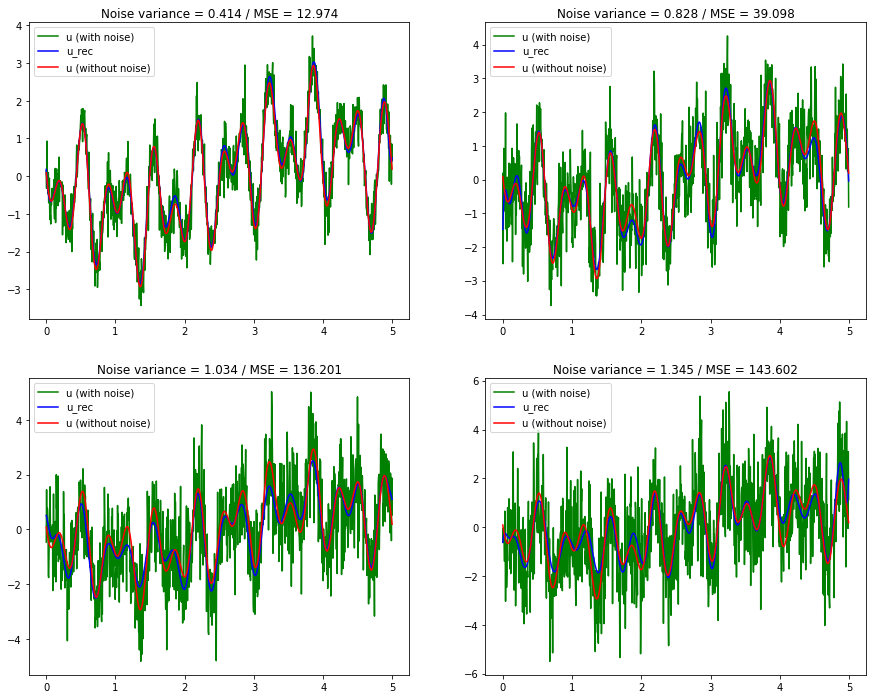

In [64]:
plt.figure(figsize = (15, 12))
plt.subplot(2,2,1)
plt.title(f'Noise variance = {round(noises[4], 3)} / MSE = {round(iaf_asdm_n_4.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_4.t, iaf_asdm_n_4.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_4.t, iaf_asdm_n_4.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_4.t, iaf_asdm_n_4.original, 'r',  label ='u (without noise)')
plt.legend()
plt.subplot(2,2,2)
plt.title(f'Noise variance = {round(noises[8], 3)} / MSE = {round(iaf_asdm_n_8.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_8.t, iaf_asdm_n_8.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_8.t, iaf_asdm_n_8.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_8.t, iaf_asdm_n_8.original, 'r', label ='u (without noise)')
plt.legend()
plt.subplot(2,2,3)
plt.title(f'Noise variance = {round(noises[10], 3)} / MSE = {round(iaf_asdm_n_10.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_10.t, iaf_asdm_n_10.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_10.t, iaf_asdm_n_10.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_10.t, iaf_asdm_n_10.original, 'r', label ='u (without noise)')
plt.legend()
plt.subplot(2,2,4)
plt.title(f'Noise variance = {round(noises[13], 3)} / MSE = {round(iaf_asdm_n_13.computeMeanSquaredError(), 3)}')
plt.plot(iaf_asdm_n_13.t, iaf_asdm_n_13.u , 'g', label = 'u (with noise)')
plt.plot(iaf_asdm_n_13.t, iaf_asdm_n_13.u_rec, 'b', label = 'u_rec')
plt.plot(iaf_asdm_n_13.t, iaf_asdm_n_13.original, 'r', label ='u (without noise)')
plt.legend()

plt.savefig('saved_images/reconstruction_with_noise.png')